# Retrieving the  GEFCom2014 (E, V2) Data

The data in this project is taken from the GEFCom2014 forecasting competition. It consists of hourly electricity load ("eload") and temperature ("tempf") values for a USA city. 
The data will be brought into the Colab session from an internet repository, aand the extracted Ecel file will be used to create a comma-seprated-value (csv) text file, similar to the one in Chapter 10 of te textbook.

In [ ]:
import numpy as np 
import pandas as pd
import os
import shutil
import matplotlib.pyplot as plt
# from common.utils import load_data, extract_data, download_file
%matplotlib inline

# !wget https://mlftsfwp.blob.core.windows.net/mlftsfwp/GEFCom2014.zip
!wget https://www.dropbox.com/s/pqenrr2mcvl0hk9/GEFCom2014.zip



In [ ]:
# !ls -l 
!unzip GEFCom2014.zip

Archive:  GEFCom2014.zip
replace GEFCom2014 Data/GEFCom2014-S_V2.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
 extracting: GEFCom2014 Data/GEFCom2014-S_V2.zip  
 extracting: GEFCom2014 Data/GEFCom2014-W_V2.zip  
  inflating: GEFCom2014 Data/READ ME_V2.txt  
  inflating: GEFCom2014 Data/Provisional_Leaderboard_V2.xlsx  
 extracting: GEFCom2014 Data/GEFCom2014-L_V2.zip  
 extracting: GEFCom2014 Data/GEFCom2014-E_V2.zip  
 extracting: GEFCom2014 Data/GEFCom2014-P_V2.zip  


In [ ]:
!ls -l

total 376488
-rw-r--r-- 1 root root     37912 Apr 19 06:21  ELOAD_lstm.keras
-rw-r--r-- 1 root root   1573348 Apr 19 06:38  GEF14.csv
drwxrwxr-x 2 root root      4096 Apr 19 06:41 'GEFCom2014 Data'
-rw-rw-r-- 1 root root   2348089 Feb 11  2016  GEFCom2014-E_V2.zip
-rw-r--r-- 1 root root   2452214 Jan 25  2016  GEFCom2014-E.xlsx
-rw-r--r-- 1 root root 126360077 Aug 11  2020  GEFCom2014.zip
-rw-r--r-- 1 root root 126360077 Aug 11  2020  GEFCom2014.zip.1
-rw-r--r-- 1 root root 126360077 Aug 11  2020  GEFCom2014.zip.2
drwxr-xr-x 1 root root      4096 Apr  8 13:32  sample_data


In [ ]:
!ls -l 'GEFCom2014 Data'/

total 123420
-rw-rw-r-- 1 root root  2348089 Feb 11  2016  GEFCom2014-E_V2.zip
-rw-rw-r-- 1 root root  2599214 Feb 11  2016  GEFCom2014-L_V2.zip
-rw-rw-r-- 1 root root  3338992 Feb 11  2016  GEFCom2014-P_V2.zip
-rw-rw-r-- 1 root root 36734790 Feb 11  2016  GEFCom2014-S_V2.zip
-rw-rw-r-- 1 root root 81149634 Feb 11  2016  GEFCom2014-W_V2.zip
-rw-rw-r-- 1 root root   195932 Feb 11  2016  Provisional_Leaderboard_V2.xlsx
-rw-rw-r-- 1 root root      389 Feb 11  2016 'READ ME_V2.txt'


# We are interested in GEFCom2014-E_V2.zip

In [ ]:
# Let's bring it to the top level before unzipping it
!mv  'GEFCom2014 Data'/GEFCom2014-E_V2.zip  ./

In [ ]:
!unzip GEFCom2014-E_V2.zip

Archive:  GEFCom2014-E_V2.zip
replace GEFCom2014-E.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: GEFCom2014-E.xlsx       


In [ ]:
# We can now verify that we hot the file GEFCom2014-E.xlsx
!ls -l

total 376488
-rw-r--r-- 1 root root     37912 Apr 19 06:21  ELOAD_lstm.keras
-rw-r--r-- 1 root root   1573348 Apr 19 06:38  GEF14.csv
drwxrwxr-x 2 root root      4096 Apr 19 06:41 'GEFCom2014 Data'
-rw-rw-r-- 1 root root   2348089 Feb 11  2016  GEFCom2014-E_V2.zip
-rw-r--r-- 1 root root   2452214 Jan 25  2016  GEFCom2014-E.xlsx
-rw-r--r-- 1 root root 126360077 Aug 11  2020  GEFCom2014.zip
-rw-r--r-- 1 root root 126360077 Aug 11  2020  GEFCom2014.zip.1
-rw-r--r-- 1 root root 126360077 Aug 11  2020  GEFCom2014.zip.2
drwxr-xr-x 1 root root      4096 Apr  8 13:32  sample_data


***We have GEFCom2014-E.xlsx***

This script will "translate" the .xlsx file to a .cvs file, so that the initial situation is the same as for the Jena temperature example from Chapter 10 of textbook - IN THIS PROCESS WE WILL ALSO REMOVE THE MLTIPLE INITIAL LINES THAT DO NOT HAVE LOAD VALUES (this is done through the "skip_rows" parameter)

In [ ]:
# CONVERT GEFCom2014-E.xlsx to a PANDAS DATAFRAME called GEFDF
# import pandas as pd

GEFDF = pd.read_excel('GEFCom2014-E.xlsx', skiprows=range(1, 17545), dtype = {'A':np.int32  ,'B':np.int8   ,'C':np.int32  ,'D':np.float64}, index_col = None )


In [ ]:
# We can "see" the Pandas DataFrame (called GEFDF) that has been obtained
print(GEFDF)

            Date  Hour    load          T
0     2006-01-01     1  3010.0  22.666667
1     2006-01-01     2  2853.0  20.666667
2     2006-01-01     3  2758.0  21.333333
3     2006-01-01     4  2705.0  19.000000
4     2006-01-01     5  2709.0  19.333333
...          ...   ...     ...        ...
78883 2014-12-31    20  4012.0  18.000000
78884 2014-12-31    21  3856.0  16.666667
78885 2014-12-31    22  3671.0  17.000000
78886 2014-12-31    23  3499.0  15.333333
78887 2014-12-31    24  3345.0  15.333333

[78888 rows x 4 columns]


In [ ]:
# Now writing out the GEFDF dataframe to a text (csv) file
GEFDF.to_csv('GEF14.csv',  encoding='utf-8', index=False, header=True, columns=['Hour','load','T'],line_terminator='\n' )
with open('GEF14.csv') as f:
    lines = f.readlines()
    last = len(lines) - 1
    lines[last] = lines[last].replace('\r','').replace('\n','')
with open('GEF14.csv', 'w') as wr:
    wr.writelines(lines)

In [ ]:
# verifying we have created the csv file GEF14.csv
!ls -l ./

total 376488
-rw-r--r-- 1 root root     37912 Apr 19 06:21  ELOAD_lstm.keras
-rw-r--r-- 1 root root   1573348 Apr 19 06:41  GEF14.csv
drwxrwxr-x 2 root root      4096 Apr 19 06:41 'GEFCom2014 Data'
-rw-rw-r-- 1 root root   2348089 Feb 11  2016  GEFCom2014-E_V2.zip
-rw-r--r-- 1 root root   2452214 Jan 25  2016  GEFCom2014-E.xlsx
-rw-r--r-- 1 root root 126360077 Aug 11  2020  GEFCom2014.zip
-rw-r--r-- 1 root root 126360077 Aug 11  2020  GEFCom2014.zip.1
-rw-r--r-- 1 root root 126360077 Aug 11  2020  GEFCom2014.zip.2
drwxr-xr-x 1 root root      4096 Apr  8 13:32  sample_data


From this point onwards, the preparation is similar as for the Jena temperature prediction case from the book but the columns in this file are just:

hour( 1 to 24) ; LOAD (e.g., 4012.0 ) ; TEMP (in oF ,  e.g., 86.5)

**Inspecting the data of the GEFC14.csv FILE**

This will separate the heade from the rest, whicj will be kept in "lines"

In [ ]:
# THIS CODE CELL IS ESSENTIALLY THE SAME AS IN THE EXAMPLE FROM CH. 10 IN BOOK
import os
fname = os.path.join("GEF14.csv")

with open(fname) as f:
    data = f.read()

lines = data.split("\n")
header = lines[0].split(",")
lines = lines[1:]
print(header)
print(len(lines))

['Hour', 'load', 'T']
78888


**Parsing the data**

We will separate temperatures in tempf, loads in eload and both in raw_data (Hour will be ignored) 

In [ ]:
# VERY SIMILAR TO THE CORRESPONDING C0DE CELL FROM CHAPTER 10 IN BOOK
# eload (electric load) is the timeseries we will predict
# tempf (temperature in Fahrenheit) is the temperature at the same time
# import numpy as np
eload = np.zeros((len(lines),))
tempf = np.zeros((len(lines),))
raw_data = np.zeros((len(lines), len(header)-2))   #chgd )-1  to )-2 to also
# remove the HOUR column, in addition to the DATE column
print(len(lines))

for m in range(78888):
    thisline  = lines[m]
    values = [float(x) for x in thisline.split(",")[1:]]
    eload[m] = values[0]         #Captures JUST E LOAD
    tempf[m] = values[1]            #Captures JUST TEMPF
    raw_data[m] = values[0]         #Like this, raw_data Captures JUST E LOAD
    # raw_data[m, :] = values[:]   # Like this, raw_data CAPTURES BOTH

78888


**Plotting the eload timeseries**

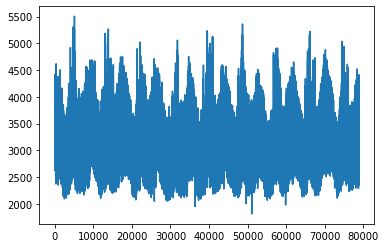

In [ ]:
from matplotlib import pyplot as plt
plt.plot(range(len(eload)), eload)

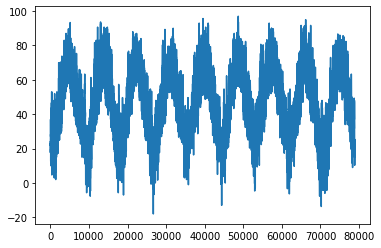

In [ ]:
plt.plot(range(len(tempf)), tempf)

**THIS IS THE BEGINNING OF THE ACTUAL SOLUTION**

**Computing the number of samples we'll use for each data split**

In [ ]:
num_train_samples = int(0.5 * len(raw_data))
num_val_samples = int(0.25 * len(raw_data))
num_test_samples = len(raw_data) - num_train_samples - num_val_samples
print("num_train_samples:", num_train_samples)
print("num_val_samples:", num_val_samples)
print("num_test_samples:", num_test_samples)

num_train_samples: 39444
num_val_samples: 19722
num_test_samples: 19722


### Preparing the data

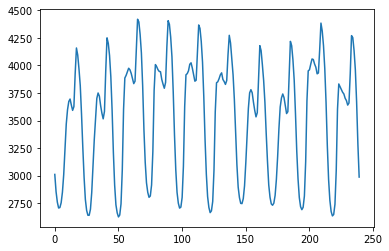

In [ ]:
# Display the ELOAD for the first 10 days
plt.plot(range(240),eload[:240])

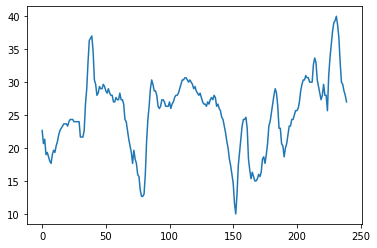

In [ ]:
# Display the tempf for the first 10 days
plt.plot(range(240),tempf[:240])

**Normalizing the data**

In [ ]:
mean = raw_data[:num_train_samples].mean(axis=0)
raw_data -= mean
std = raw_data[:num_train_samples].std(axis=0)
raw_data /= std

In [ ]:
mean

array([3310.41855542])

In [ ]:
std

array([585.83380329])

**Instantiating datasets for training, validation, and testing**

In [ ]:
# LETS JUST USE ELOAD TO FORECAST ELOAD
# THIS TIME, ( 1-input case)
from tensorflow import keras

horizon = 6       # Num. of hours ahead for forecast
sampling_rate = 1
sequence_length = 36
delay = sampling_rate * (sequence_length + horizon - 1) 
batch_size = 128

train_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],    
    targets=raw_data[delay:], # This would used "Normalized Targets"
    # targets=eload[delay:], # This would used "Not-normalized eload targets"
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,                  #changed to false JUST FOR VERIF
    batch_size= num_train_samples,
    start_index=0,
    end_index=num_train_samples)

val_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],    # changed from raw_data to just eload not really
    targets=raw_data[delay:],  # This would used "Normalized Targets"
    # targets=eload[delay:], # This would used "Not-normalized eload targets"
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=num_val_samples,
    start_index=num_train_samples,
    end_index=num_train_samples + num_val_samples)

test_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],     # changed from raw_data to just eload
    targets=raw_data[delay:],  # This would used "Normalized Targets"
    # targets=eload[delay:], # This would used "Not-normalized eload targets"
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=False,
    batch_size=num_test_samples,
    start_index=num_train_samples + num_val_samples)

**Inspecting the output of one of our datasets**

In [ ]:
for samples, targets in train_dataset:
    print("samples shape:", samples.shape)
    print("targets shape:", targets.shape)
    break

samples shape: (39409, 36, 1)
targets shape: (39409, 1)


In [ ]:
# Import
from tensorflow import keras
from tensorflow.keras import layers


**End of " Bringing GEFCom14 DATA"**